In [121]:
import pandas as pd  # Pandas is used for data manipulation and analysis, especially handling structured data in DataFrames.
import requests  # Requests is used to send HTTP requests to fetch web pages or API data.
from bs4 import BeautifulSoup  # BeautifulSoup is used for web scraping, allowing parsing and extraction of HTML/XML content.
import time  # Time module is used for handling time-related tasks, such as adding delays in web scraping.

In [122]:
url = "https://www.flipkart.com/"  # URL of the website to be accessed.
r = requests.get(url)  # Sends an HTTP GET request to the specified URL and retrieves the webpage content.
r  # Displays the response object, which contains the status code and response data.

<Response [200]>

In [123]:
customer_name = []  # Stores the names of customers who have given reviews.
product_comments = []  # Stores the text of customer reviews/comments about the product.
comment_date = []  # Stores the date on which each review/comment was posted.
product_reviews = []  # Stores the ratings or reviews given to the product (e.g., star ratings).

# Changes for link

In [124]:
# Cleans the given Flipkart URL by removing any extra parameters after '=FLIPKART'.
def clean_url(url):
    return url.split("=FLIPKART")[0] + "=FLIPKART"# Splits the URL at '=FLIPKART' and keeps only the essential part.

In [125]:
Product_link = input("Enter the link") # Takes the product page link as user input.
num = int(input("Enter the number of pages you want to print: ")) # Takes the number of review pages to scrape.
second_link = Product_link.replace("/p/", "/product-reviews/")# Replaces "/p/" in the product link with "/product-reviews/" to navigate to the review section of the product.
second_link = clean_url(second_link)# Cleans the modified URL using the 'clean_url' function to ensure it has the correct format.

Enter the linkhttps://www.flipkart.com/apple-iphone-16-pro-black-titanium-256-gb/p/itm4652c565d11da?pid=MOBH4DQFEJYHHM7X&lid=LSTMOBH4DQFEJYHHM7X0NSARQ&marketplace=FLIPKART&store=tyy%2F4io&srno=b_1_7&otracker=CLP_BannerX3&fm=organic&iid=bc034d90-0e25-4e7d-bc48-68cff1a1d8c9.MOBH4DQFEJYHHM7X.SEARCH&ppt=clp&ppn=mobile-phones-store&ssid=bbujd9fosg0000001744191577016
Enter the number of pages you want to print: 12


In [126]:
headers = {"User-Agent": "Mozilla/5.0"}  # Prevent request blocking

#************ Scrapes customer reviews, comments, names, and dates from the Flipkart product review page.***********
def scraping_data(y):
    url = f"{second_link}&page={y}"  # Constructs the URL for the specific review page.
    
    r = requests.get(url, headers=headers)  # Sends an HTTP GET request with headers to avoid bot detection.
    soup = BeautifulSoup(r.text, "lxml")  # Parses the webpage content using BeautifulSoup and the 'lxml' parser.

    # Find all divs containing review data
    boxes = soup.find_all("div", class_="DOjaWF gdgoEp col-9-12")
    
    for box in boxes:
        # Extract customer names
        names = box.find_all("p", class_="_2NsDsF AwS1CA")
        customer_name.extend([i.text.strip() for i in names])  # Add extracted names to 'customer_name' list

        # Extract product comments
        comments = box.find_all("p", class_="z9E0IG")
        product_comments.extend([i.text.strip() for i in comments])  # Add extracted comments to 'product_comments' list

        # Extract comment dates
        date = [i.text.strip() for i in box.find_all("p", class_="_2NsDsF")]
        filtered_dates = date[1::2]  # Select every second element (to avoid name duplication)
        if filtered_dates:  # Ensure there are valid dates before adding
            comment_date.extend(filtered_dates)

        # Extract product reviews
        reviews = []

        # Extract review texts
        review_elements = box.find_all("div", class_="")
        review_texts = [i.get_text(strip=True).replace("READ MORE", "").strip() for i in review_elements]
        filtered_reviews = review_texts[1:-1]  # Remove the first and last elements (which might be unwanted)

        for index, review_text in enumerate(filtered_reviews, start=1):
            if review_text and index % 2 == 0:  # Keep only even element
                reviews.append(review_text)

        if reviews:  # Ensure there are valid reviews before adding
            product_reviews.extend(reviews)

    print(f"Processed page {y}")  # Indicate which page has been processed

    time.sleep(2)  # Pause for 2 seconds to avoid triggering anti-scraping measures
    
# Convert product_reviews to a list to ensure it's properly formatted
product_reviews = list(product_reviews)

print("Data collection complete.")  # Indicate that data scraping is finished

Data collection complete.


In [127]:
for y in range(1,num+1):# Loop through the specified number of pages (from 1 to 'num')
    scraping_data(y) # Call the scraping function for each page

print("Data collection complete.")# Print a message once all pages have been processed

Processed page 1
Processed page 2
Processed page 3
Processed page 4
Processed page 5
Processed page 6
Processed page 7
Processed page 8
Processed page 9
Processed page 10
Processed page 11
Processed page 12
Data collection complete.


In [128]:
print(len(customer_name))  # Prints the total number of customer names collected.
print(len(product_comments))  # Prints the total number of product comments collected.
print(len(comment_date))  # Prints the total number of comment dates collected.
print(len(product_reviews))  # Prints the total number of product reviews collected.

111
111
111
111


In [129]:
# Coverting the above data in Dataframe
df = pd.DataFrame({'Customer_Name':customer_name,
                   'Comments':product_comments,
                   'Comment_Date':comment_date,
                   'Reviews':product_reviews})
df.head() 

,Customer_Name,Comments,Comment_Date,Reviews
0,Kapil Chaudhary,Fabulous!,1 month ago,Best camera phone
1,Suraj Kumar chourasia,Terrific purchase,1 month ago,I m satisfied very nice look and camera is exc...
2,Shobhan Raj,Brilliant,"Oct, 2024",Best iPhone ever thanks Flipkart for deliveri...
3,Pavan Gurjar,Worth every penny,1 month ago,Everything is Perfect But Ios 26 Ruined Everyt...
4,Flipkart Customer,Great product,10 months ago,Loved it best in the market . You should go fo...


In [130]:
df.shape

(111, 4)

In [64]:
# df.to_csv('C:/Users/harsh/OneDrive/Desktop/web scrapping/flipkart_450_pro.csv',index=False)

# NLP model based on above data

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [132]:
df.rename(columns={'Reviews': 'text'}, inplace=True)

In [133]:
data = pd.DataFrame(df['text'])
data.head()

,text
0,Best camera phone
1,I m satisfied very nice look and camera is exc...
2,Best iPhone ever thanks Flipkart for deliveri...
3,Everything is Perfect But Ios 26 Ruined Everyt...
4,Loved it best in the market . You should go fo...


# Cleaning the data

In [134]:
data.iloc[0,0]

'Best camera phone'

### Step 1 converitng the data to lower case

In [135]:
data.text = data.text.str.lower()

In [136]:
data.iloc[0,0]

'best camera phone'

### Step 2 removing the stop words

In [137]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KaushalDhumal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [138]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [139]:
data['text'] = data['text'].apply(lambda x: ' '.join([abc
                                                      for abc in x.split()
                                                      if abc not in (stop)]))

### Step 3 Removing URL

In [140]:
data['text'] = data['text'].replace(r'http\S+|www\S+','',regex=True)

### Step 4 Removing all the puntuation

In [141]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [142]:
def remove_punctuation(b):
    text = ''.join([c
                    for c in b
                    if c not in string.punctuation])
    return text

In [143]:
data['text'] = data['text'].apply(lambda x: remove_punctuation(x))

### Step 5 Remove Numbers

In [144]:
data['text'] = data['text'].replace(r'\d+','',regex=True)

### Step 6 Removing the common words 

In [145]:
import re
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\KaushalDhumal\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [146]:
def clean_data(text):
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like a or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)## 2 alphabet like ab or ad & aA
    text =  re.sub('product|Product|PRODUCT', '', text)
    text =  " ".join(w
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens
                      if w.lower() in words)  #
    return text

In [147]:
data = pd.DataFrame(data['text'].apply(lambda x:clean_data(x)))

# Lammatization

In [148]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
word_tokenizer = nltk.tokenize.WhitespaceTokenizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KaushalDhumal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [149]:
def lemmatize_(text):
    return [lemmatizer.lemmatize(w,"v")
            for w in word_tokenizer.tokenize(text)]

In [150]:
data.text = data['text'].apply(lambda x :' '.join(lemmatize_(x)))

In [151]:
data['text'] = data['text'].apply(lambda x: ' '.join([abc   # x = Text
                                                      for abc in x.split() # word tokenizer # abc = Delhi
                                                      if abc not in (stop)]))

### Strip extra white spaces

In [152]:
data['text'] = (data['text'].astype("str").str.rstrip())

### Removing the emojis

In [153]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                               u"\U0001F700-\U0001F77F"  # Alchemical Symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"  # Enclosed Characters
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [154]:
df['text'] = df['text'].apply(remove_emojis)

### Removing the Duplicate Row

In [155]:
data = data.drop_duplicates('text')
data.head()

,text
0,best camera phone
1,satisfy nice look camera excellent
2,best ever thank days
3,everything perfect ruin everything
4,best market


### Data cleaning is over

# Term Documnet Matrix

In [156]:
from sklearn.feature_extraction.text import CountVectorizer
cv =  CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) # TERM = KEY WORDS
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
affluent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
amaze,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
apart,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
apple,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
tdm['freq'] = tdm.sum(axis=1)
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,83,84,85,86,87,88,89,90,91,freq
0,absolutely,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,affluent,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,amaze,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
3,apart,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,apple,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [158]:
tdm1 = tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA
tdm1.head(10)

,Word,freq
125,pro,27
117,phone,22
68,good,18
25,camera,16
16,best,15
12,battery,12
128,quality,10
113,performance,8
102,nice,8
9,awesome,8


# From here we can say that Good is the most important word in our documnet

# Generating the Word Cloud

In [159]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 3179 words in the combination of all review.


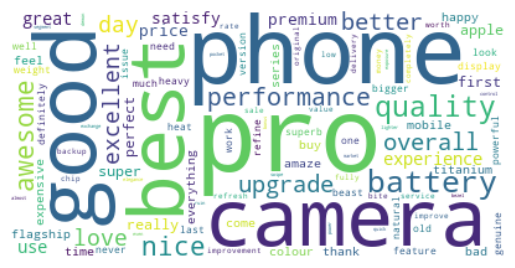

In [160]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

cloud = WordCloud(stopwords=set(STOPWORDS), # BACK UP
                      background_color="white",
                      collocations=False,
                      max_words=100).generate(text)

plt.imshow(cloud, interpolation='bilinear') # IM = IMAGE
plt.axis("off") # NO AXIS
plt.show() # DISPLAY PLOT

# Sentiment Analysis

In [161]:
data.head()

,text
0,best camera phone
1,satisfy nice look camera excellent
2,best ever thank days
3,everything perfect ruin everything
4,best market


In [164]:
from textblob import TextBlob

data['polarity'] = data['text'].apply(lambda x: TextBlob(x).sentiment.polarity) # polarity range -1 to +1
data.head(5)

,text,polarity
0,best camera phone,1.0
1,satisfy nice look camera excellent,0.8
2,best ever thank days,1.0
3,everything perfect ruin everything,1.0
4,best market,1.0


In [165]:
def get_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['polarity'].apply(get_sentiment)
data.head()

,text,polarity,Sentiment
0,best camera phone,1.0,Positive
1,satisfy nice look camera excellent,0.8,Positive
2,best ever thank days,1.0,Positive
3,everything perfect ruin everything,1.0,Positive
4,best market,1.0,Positive


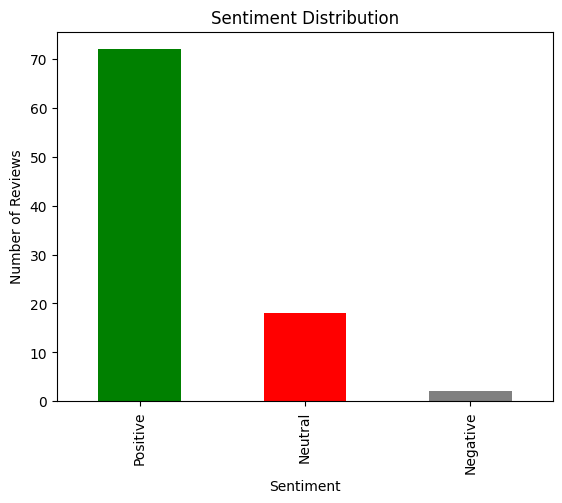

In [166]:
data['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


In [167]:
#data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,text,polarity,Sentiment
0,best camera phone,1.0,Positive
1,satisfy nice look camera excellent,0.8,Positive
2,best ever thank days,1.0,Positive
3,everything perfect ruin everything,1.0,Positive
4,best market,1.0,Positive


In [168]:
data.Sentiment.value_counts()

Positive    72
Neutral     18
Negative     2
Name: Sentiment, dtype: int64

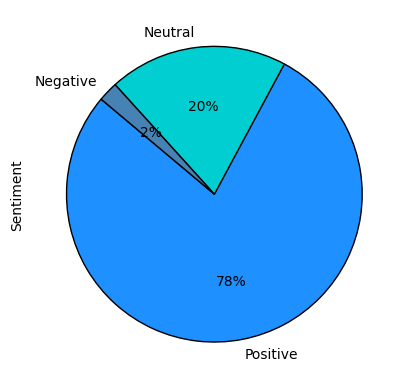

In [169]:
colors = ["#1E90FF", "#00CED1", "#4682B4", "#20B2AA", "#5F9EA0"]
data.Sentiment.value_counts().plot.pie(
    autopct="%0.0f%%", 
    colors=colors, 
    startangle=140, 
    wedgeprops={"edgecolor": "black"})
plt.show()

### So we can say that 78% of people have the positive review towards the product

# Term Frequency/Ienverse Documentation Frequency

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer

# settings that you use for count vectorizer will go here
tfidf_vectorizer = TfidfVectorizer(use_idf=True,stop_words='english',analyzer='word')

# just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(data.text)
feature_names = cv.get_feature_names_out()  ## EVERY WORD NAME
abc = tfidf_vectorizer_vectors.transpose()
output=pd.DataFrame.sparse.from_spmatrix(abc,index=feature_names)
output.reset_index(inplace=True)
output.rename(columns = {'index':'Word'}, inplace = True) # RENAMING
output.head()

,Word,0,1,2,3,4,5,6,7,8,...,82,83,84,85,86,87,88,89,90,91
0,absolutely,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
1,affluent,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,amaze,0.0,0.0,0.0,0.0,0.0,0.0,0.506574,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,apart,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,apple,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [171]:
output['TF*IDF'] = output.max(axis=0).T
output=output[["Word","TF*IDF"]] #SUBSET OF 2 COLUMNS
output.sort_values(by='TF*IDF',ascending=False,inplace=True) # SORTING DATA
output.head(20)

,Word,TF*IDF
46,desert,1.0
9,awesome,1.0
45,descent,1.0
61,fine,1.0
16,best,1.0
59,feel,1.0
13,beast,1.0
54,experience,1.0
21,bonus,1.0
10,backup,1.0


### So this are the most important word in every document

## Model Building Pipeline

In [106]:
#Prepare data for modeling
from sklearn.model_selection import train_test_split
x = data['text']
y = data['Sentiment']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=46)

In [108]:
#TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)


### Logistic Regression Model

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_tfidf, y_train)

y_pred_lr = lr.predict(x_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8421052631578947
[[ 0  3]
 [ 0 16]]
              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00         3
    Positive       0.84      1.00      0.91        16

    accuracy                           0.84        19
   macro avg       0.42      0.50      0.46        19
weighted avg       0.71      0.84      0.77        19



In [111]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)

y_pred_nb = nb.predict(x_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8421052631578947
[[ 0  3]
 [ 0 16]]
              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00         3
    Positive       0.84      1.00      0.91        16

    accuracy                           0.84        19
   macro avg       0.42      0.50      0.46        19
weighted avg       0.71      0.84      0.77        19



In [112]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(x_train_tfidf, y_train)

y_pred_svm = svm.predict(x_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.7368421052631579
[[ 0  3]
 [ 2 14]]
              precision    recall  f1-score   support

     Neutral       0.00      0.00      0.00         3
    Positive       0.82      0.88      0.85        16

    accuracy                           0.74        19
   macro avg       0.41      0.44      0.42        19
weighted avg       0.69      0.74      0.71        19

